Import Libraries

In [1]:
import os
import numpy as np 
from PIL import Image, ImageOps
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

Convert Image to array and append to *images* list to get list of arrays

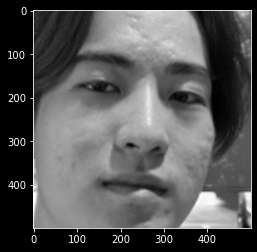

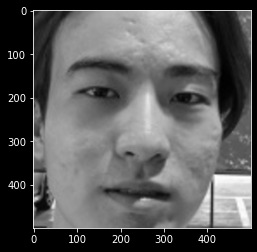

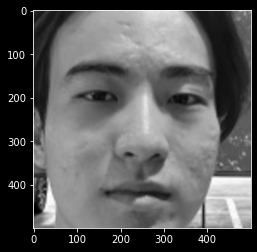

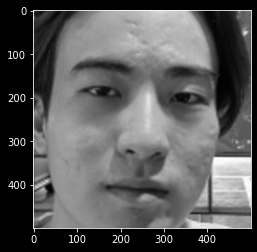

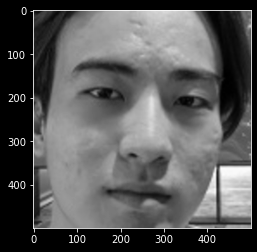

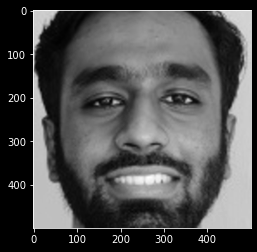

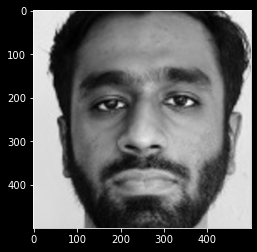

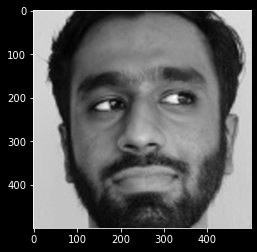

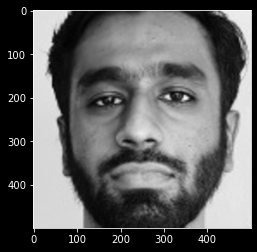

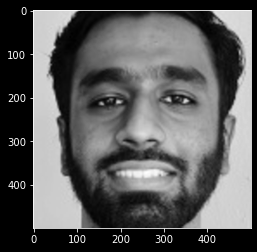

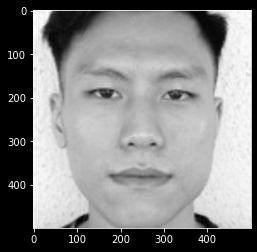

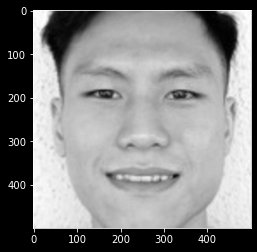

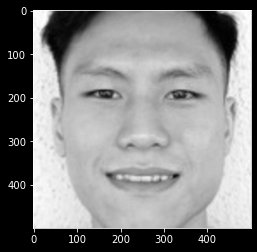

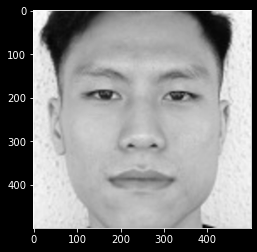

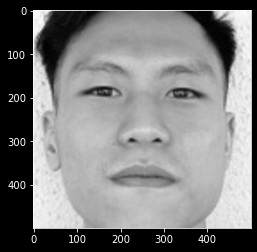

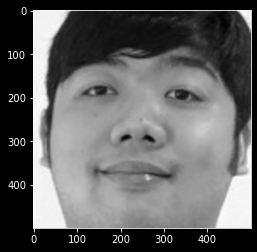

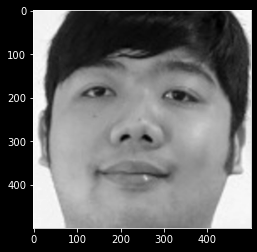

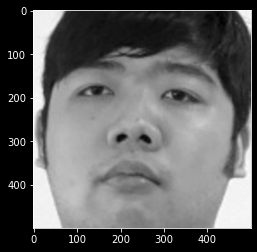

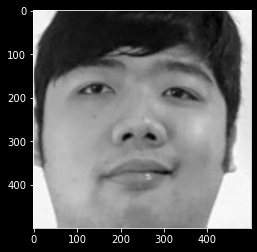

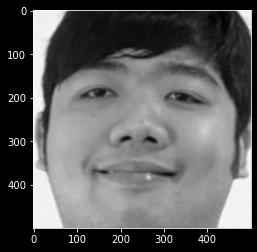

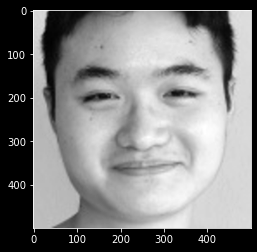

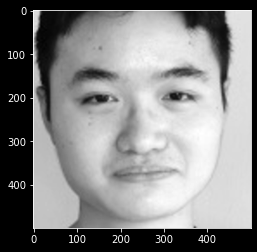

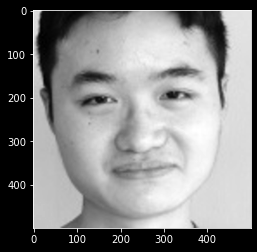

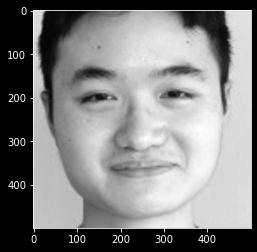

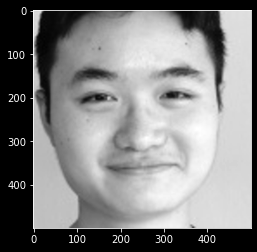

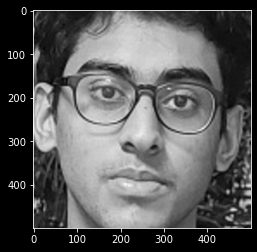

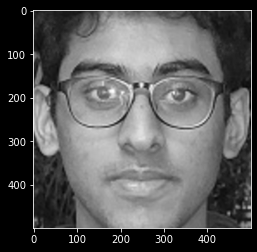

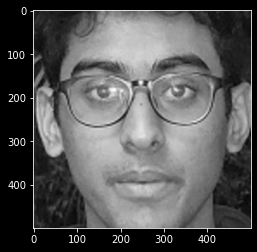

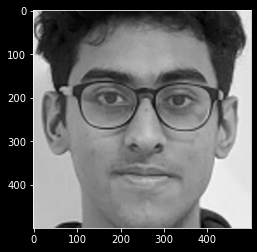

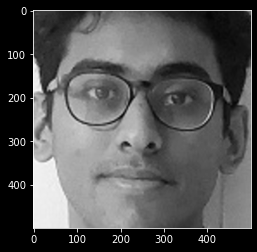

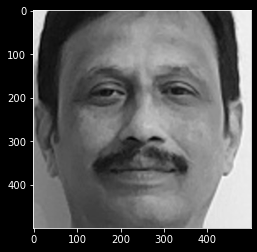

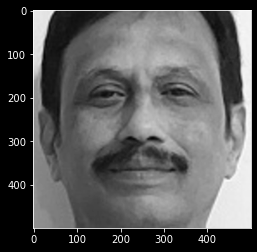

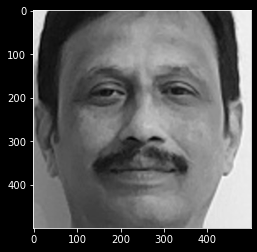

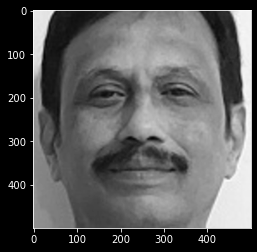

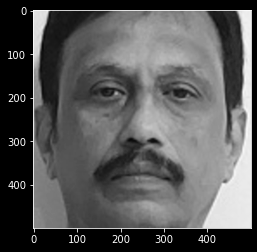

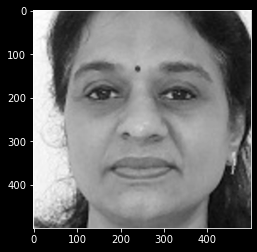

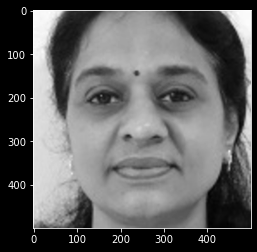

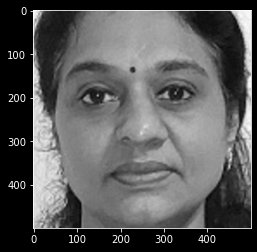

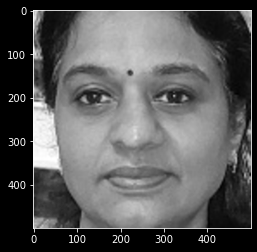

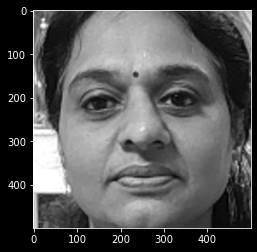

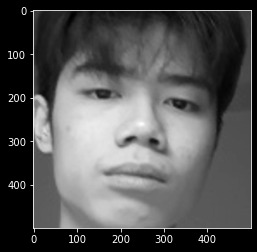

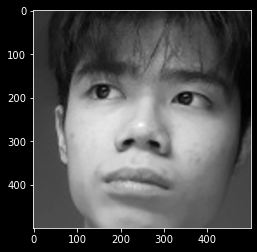

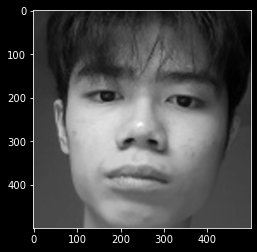

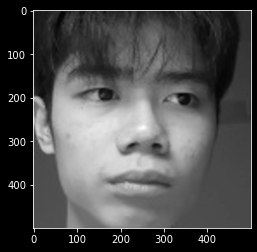

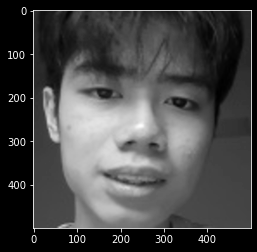

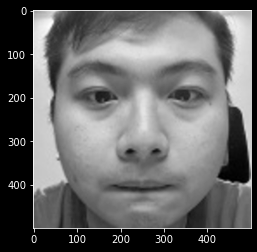

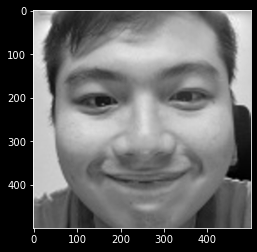

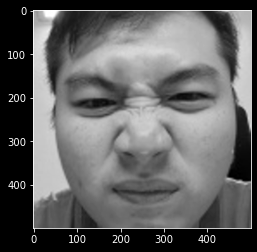

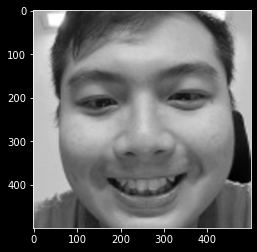

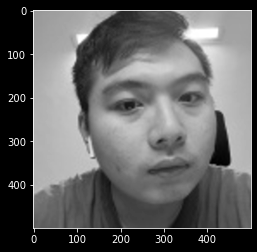

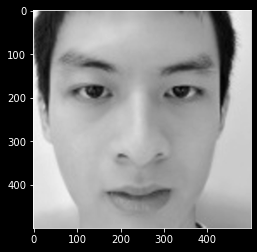

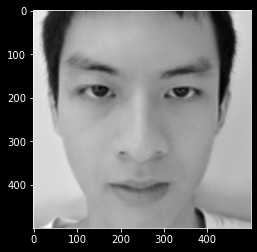

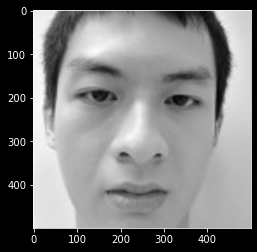

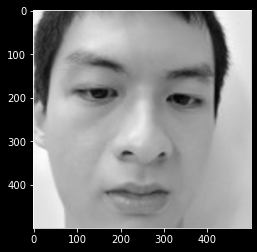

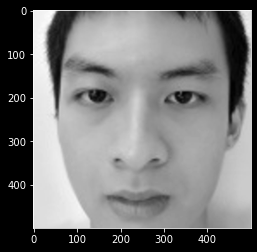

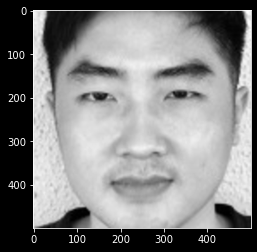

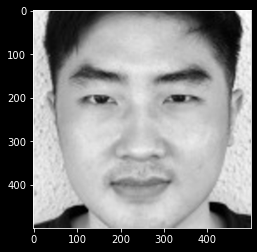

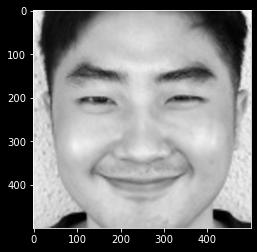

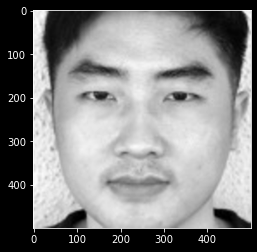

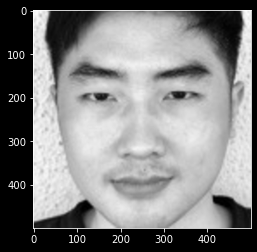

60


[[array([[ 58,  57,  55, ..., 123, 118, 116],
         [ 57,  56,  54, ..., 123, 118, 116],
         [ 54,  54,  52, ..., 123, 118, 116],
         ...,
         [138, 138, 138, ...,  85,  94,  98],
         [138, 138, 138, ...,  78,  86,  90],
         [138, 138, 138, ...,  75,  83,  87]], dtype=uint8),
  array([[ 32,  32,  32, ..., 122, 125, 126],
         [ 32,  32,  32, ..., 121, 125, 126],
         [ 32,  32,  32, ..., 120, 123, 124],
         ...,
         [ 42,  42,  42, ..., 175, 175, 175],
         [ 32,  32,  32, ..., 170, 170, 170],
         [ 28,  28,  28, ..., 168, 168, 169]], dtype=uint8),
  array([[ 49,  49,  49, ..., 122, 122, 123],
         [ 49,  49,  49, ..., 123, 124, 125],
         [ 49,  49,  49, ..., 126, 127, 128],
         ...,
         [117, 117, 117, ..., 138, 138, 138],
         [117, 117, 117, ..., 138, 138, 138],
         [117, 117, 117, ..., 137, 137, 137]], dtype=uint8),
  array([[ 62,  61,  58, ...,  97,  97,  97],
         [ 61,  60,  57, ...,  97,  97,

In [31]:
data_set = 'train_data'
DEFAULT_SIZE = [500, 500]

def image_toarray(image_path = data_set, default_size= DEFAULT_SIZE):
    images = []
    image_names = []
    for person_name in os.listdir(data_set):
        person_folder = os.path.join(data_set, person_name)
        for img_name in os.listdir(person_folder):
            image_names.append(img_name)
            actualimage = Image.open(os.path.join(person_folder,img_name)) #assign image to actualimage
            actualimage = ImageOps.exif_transpose(actualimage)
            actualimage = actualimage.convert("L")#greyscale

            if (default_size is not None ):  #resize fucntion
                actualimage = actualimage.resize(default_size)
                plt.imshow(actualimage,cmap=plt.cm.gray)
                plt.show()
            images.append(np.asarray (actualimage , dtype =np. uint8 ))
    print(len(images))
    return [images,image_names]
image_toarray()

Reshape image as 1d column vector and append to matrix

In [3]:
def as_col_matrix(X):    #assemble image to data matrix, each column is 1 image
    if len (X) == 0:
        return np. array ([])
    mat = np.empty((X[0].size , 0), dtype = X[0].dtype)
    for col in X:
        mat = np.hstack(( mat , np.asarray( col ).reshape(-1 , 1))) # R*C x 1 
    return mat

Get mean of rows to form mean face

60


Text(0.5, 1.0, 'Mean Face')

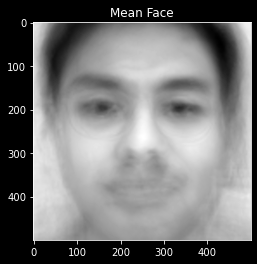

In [4]:
[X, y] = image_toarray()   
#print([X,y])
#print(image_toarray())
average_weight_matrix = np.reshape(as_col_matrix(X).mean(axis=1), DEFAULT_SIZE)
plt.style.use("dark_background")
plt.imshow(average_weight_matrix, cmap=plt.cm.gray)
plt.title("Mean Face")
#print(len(X))

In [8]:
def numofprincipalcomponents(eigenvalues, variance=.95):
    for numofcomp, eigen_value_cumsum in enumerate(np.cumsum(eigenvalues) / np.sum(eigenvalues)):
        if eigen_value_cumsum > variance:
            return numofcomp

def pca(X):
    [rows, images] = X.shape
    num_components = rows
    mu = X.mean( axis=1, keepdims=True)
    X = X - mu
    if rows<images:
        C = np.matmul(X,X.T)                  #this to get smaller dimension C is covarience matrix
        [eigenvalues , eigenvectors] = np.linalg.eigh(C)
    
    else:
        C = np.matmul(X.T,X)
        [eigenvalues , eigenvectors] = np.linalg.eigh(C)
        eigenvectors = np.matmul(X, eigenvectors)
        
    # sort eigenvectors descending by their eigenvalue
    dxvalues = np.argsort (- eigenvalues ) #Get order of index of highest - lowest eigenvalue as dxvalues
    eigenvalues = eigenvalues [dxvalues] #Sort eigenvalues by highest - lowest using index dxvalues
    eigenvectors = eigenvectors [:, dxvalues] #Do the same for eigenvectors
    pcomponents = numofprincipalcomponents(eigenvalues)
    eigenvalues = eigenvalues [0 : pcomponents].copy ()
    eigenvectors = eigenvectors [: ,0 : pcomponents].copy ()
    
    print("No. of PC: %d" % pcomponents)
    print("No. of eigenvalues: %d" % eigenvalues.shape)
    print("Row x Col of eigenvectors: %d %d" %eigenvectors.shape)
    #mu = mu.tolist()
    X=X.T
    print(X.shape)
    return  [eigenvalues , eigenvectors , mu]  

[eigenvalues, eigenvectors, mean] = pca(as_col_matrix(X))
   

No. of PC: 27
No. of eigenvalues: 27
Row x Col of eigenvectors: 250000 27
(60, 250000)


Print first 16 Eigenfaces

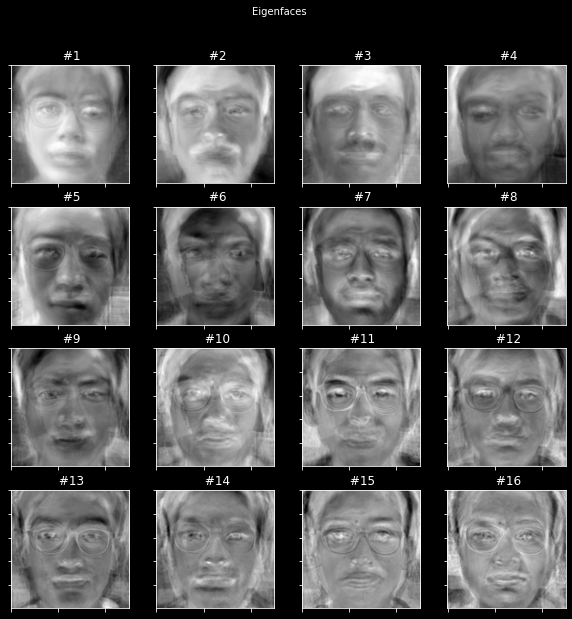

In [7]:
def subplot ( title , images , rows , cols , sptitle ="", sptitles =[] , colormap = plt.cm.gray, filename = None, figsize = (10, 10) ):
    fig = plt.figure(figsize = figsize)
    # main title
    fig.text (.5 , .95 , title , horizontalalignment ="center")
    for i in range ( len ( images )):
        ax0 = fig.add_subplot( rows , cols ,( i +1))
        plt.setp ( ax0.get_xticklabels() , visible = False )
        plt.setp ( ax0.get_yticklabels() , visible = False )
        if len ( sptitles ) == len ( images ):
            plt.title("%s #%s" % ( sptitle , str ( sptitles [i ]) )  )
        else:
            plt.title("%s #%d" % ( sptitle , (i +1) )  )
        plt.imshow(np.asarray(images[i]) , cmap = colormap )
    if filename is None :
        plt.show()
    else:
        fig.savefig( filename )

        
E = []
number = eigenvectors.shape[1]
for i in range (min(number, 16)):
    e = eigenvectors[:,i].reshape(DEFAULT_SIZE)
    E.append(np.asarray(e))
# plot them and store the plot to " python_eigenfaces .pdf"
plt.style.use("dark_background")
subplot ( title ="Eigenfaces", images=E, rows =4, cols =4, colormap =plt.cm.gray , filename ="python_pca_eigenfaces.png")

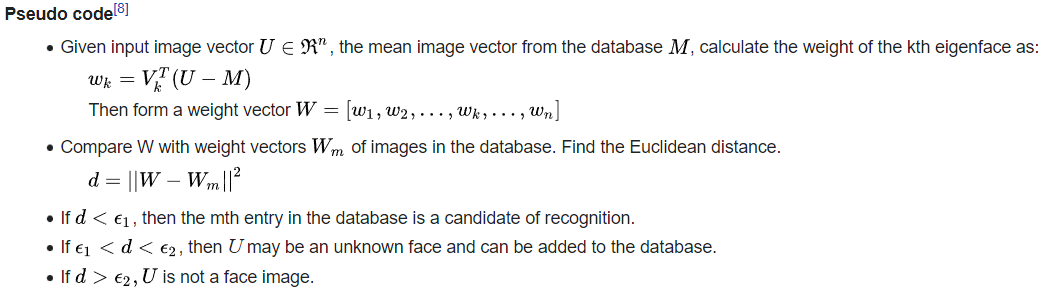

Calculation and comparison of weightage to get minimum euclidean distance for recognition 

Predicted image is number: 10
length of projections:60
[array([[ 8.44581021e+08],
       [-7.09011875e+07],
       [ 4.21742019e+08],
       [-1.85716992e+08],
       [ 4.05998995e+08],
       [-2.53839036e+07],
       [ 8.47344236e+06],
       [-2.10009089e+08],
       [ 1.24960640e+08],
       [-7.24106056e+07],
       [ 3.41051123e+07],
       [-1.76548593e+08],
       [ 1.32781183e+07],
       [-8.65779101e+07],
       [ 5.11908589e+06],
       [-7.06453325e+07],
       [ 5.64955363e+07],
       [-9.25496683e+07],
       [ 7.33994771e+07],
       [-9.66957567e+06],
       [-2.06233209e+07],
       [ 8.15836338e+06],
       [ 1.93700427e+06],
       [-2.27870297e+06],
       [-4.36151070e+06],
       [-1.55609919e+06],
       [ 1.44859576e+07]]), array([[ 5.82118435e+08],
       [ 3.70091199e+06],
       [ 6.86416389e+08],
       [-4.04205882e+08],
       [ 6.23088375e+08],
       [ 1.20125515e+08],
       [-1.29845390e+08],
       [-9.53532808e+07],
       [ 8.26728770e+07],
      

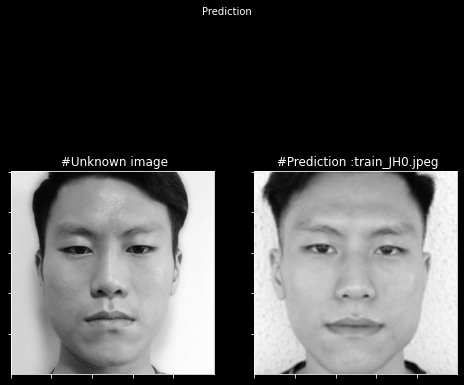

In [23]:
def project (W , X , mu):                        
    return np.matmul(W.T , X-mu)

def dist_metric(p,q):                            #Function for basic calculations of euclidean distance
    p = np.asarray(p).flatten()
    q = np.asarray (q).flatten()
    return np.sqrt (np.sum (np. power ((p-q) ,2)))

def predict (W, mu , projections, y, X):         #predict Function to get mindist
    minDist = float("inf")
    minClass = -1
    Q = project (W, X.reshape (-1 , 1) , mu)     #Multiply Eigenvectors by InputImage - Mean, to generate Weight vector. 
    for i in range (len(projections)):           #This part sorts thru dist array and find mindist
        dist = dist_metric(projections[i], Q)   # Calulate distance between input and weights using each element of Weight vector, and find minimum
        if dist < minDist:
            minDist = dist
            minClass = i
    return minClass

projections = []
for xi in X:
    projections.append(project(eigenvectors, xi.reshape(-1, 1) , mean)) # Weight vector generation

image = Image.open(r"junhantest01.jpg") #Unknown image input processing
image = ImageOps.exif_transpose(image)
image = image.convert ("L")
if (DEFAULT_SIZE is not None ):
    image = image.resize (DEFAULT_SIZE , Image.ANTIALIAS )
test_image = np. asarray (image , dtype =np. uint8 )
predicted = predict(eigenvectors, mean , projections, y, test_image)

plt.style.use("dark_background")
subplot ( title ="Prediction", images =[test_image, X[predicted]], rows =1, cols =2, 
         sptitles = ["Unknown image", "Prediction :{0}".format(y[predicted])] , colormap =plt.cm.gray , 
         filename ="prediction_test.png", figsize = (8,8))
print('Predicted image is number:', predicted)
print('length of projections:%d' %len(projections))
print(projections)